### importing libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from scipy.fft import rfft, rfftfreq #fourier transformation package
import pywt
from scipy import signal
from ssqueezepy import ssq_cwt, ssq_stft

### storing names of all csv files per folder

In [2]:
heated = ["25-1","25-2","25-3","250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
room_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]
sat_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
sat_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]

### importing one file and preprocessing it

In [25]:
#mostly dropping rows & columns
#then resetting index
df = pd.read_csv("./CSV/Room Temp/Brine/B-750-1.csv", sep=r'\s*,\s*',engine='python')
df.drop(df.index[0:14],0,inplace=True)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df.drop(df.index[0:2], inplace=True)
df = df.reset_index(drop=True)
df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [Âµs],Time 2 [Âµs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [Â°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,46923,4.10.2018 3:46:13,Direct (default),1963,54.5,0,0.107,0,1,31,...,87.7,99.2,99.2,99.2,99.2,99.2,98.4,51.8,17.2,21.4
1,46922,4.10.2018 3:46:12,Direct (default),2494,42.9,0,0.107,0,1,31,...,-87.6,-99.2,-99.2,-99.2,-99.2,-99.2,-96.8,-49.6,-16.0,-20.0
2,46921,4.10.2018 3:46:11,Direct (default),2253,47.5,0,0.107,0,1,31,...,-89.2,-99.2,-99.2,-99.2,-99.2,-99.2,-95.2,-47.3,-14.2,-18.1
3,46920,4.10.2018 3:46:10,Direct (default),2131,50.2,0,0.107,0,1,31,...,-89.6,-99.2,-99.2,-99.2,-99.2,-99.2,-93.2,-45.8,-13.5,-17.1
4,46919,4.10.2018 3:46:9,Direct (default),2277,47,0,0.107,0,1,31,...,-90.2,-99.2,-99.2,-99.2,-99.2,-99.2,-92.2,-45.1,-13.3,-17.0
5,46918,4.10.2018 3:46:8,Direct (default),1911,56,0,0.107,0,1,31,...,91.7,99.2,99.2,99.2,99.2,99.2,91.8,44.9,13.5,16.5
6,46917,4.10.2018 3:46:7,Direct (default),2512,42.6,0,0.107,0,1,31,...,-91.4,-99.2,-99.2,-99.2,-99.2,-99.2,-91.1,-44.4,-13.6,-16.9
7,46916,4.10.2018 3:46:6,Direct (default),2078,51.5,0,0.107,0,1,31,...,-91.4,-99.2,-99.2,-99.2,-99.2,-99.2,-89.9,-44.3,-13.8,-17.4
8,46915,4.10.2018 3:46:5,Direct (default),2277,47,0,0.107,0,1,31,...,-91.5,-99.2,-99.2,-99.2,-99.2,-99.2,-91.1,-45.7,-15.3,-18.4
9,46914,4.10.2018 3:46:4,Direct (default),2131,50.2,0,0.107,0,1,31,...,-94.4,-99.2,-99.2,-99.2,-99.2,-99.2,-92.4,-46.9,-16.4,-19.5


In [4]:
time = np.arange(start=0, stop=199, step=0.5) #x-axis for the observations

### plotting all observations for a csv

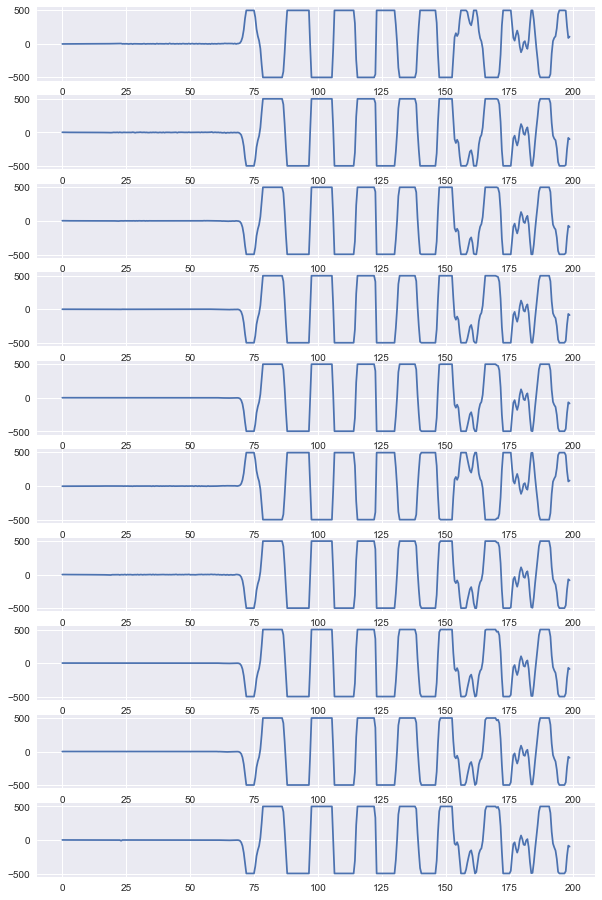

In [26]:
fig, axs = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs[i].plot(time, df.iloc[i, 21:].astype(float)*5) 
#df.iloc[i, 21:] gives all the values for each observation
#multiplied by 5 because amplitude is 500

### plotting all fft'ed graphs for all observations of a csv

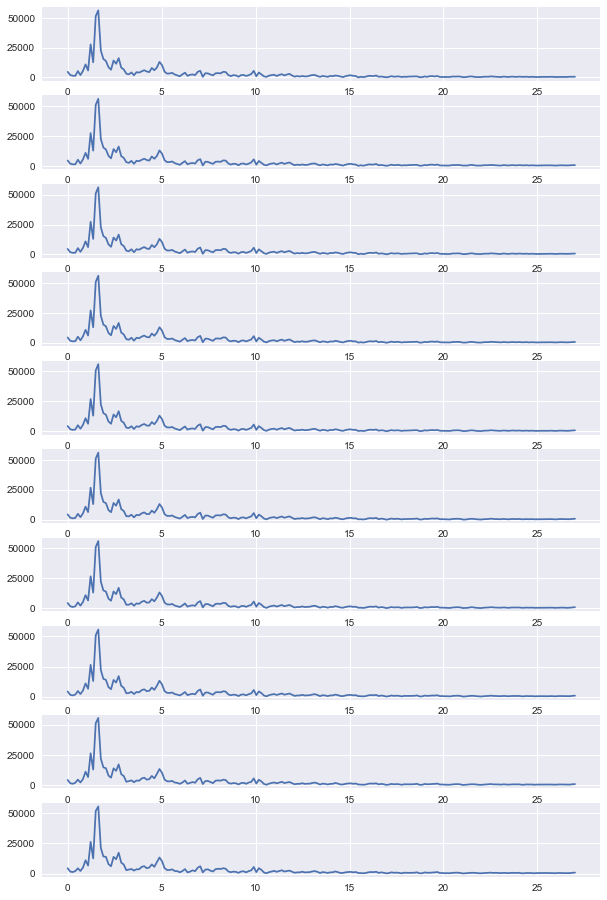

In [27]:
fig_f, axs_f = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs_f[i].plot(rfftfreq(len(df.iloc[i][21:]), 1/54), np.abs(rfft(df.iloc[i][21:]*5)))

# actual required part of the project

### creating the dataframe that stores the frequency values obtained from fft

In [7]:
new_df = pd.DataFrame(columns = ['Type', 'Sub Type', 'Temperature', 'ID', 'Max Frequency', 'Mean Frequency', 'Centroid'])
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid


### looping through the csv files in the heated folder, preprocessing it, running observations through fft then calculating and storing the required frequencies

In [8]:
for df_name in heated:
    df = pd.read_csv("./CSV/Heated/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
    df.drop(df.index[0:14],0,inplace=True)
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0]
    df.drop(df.index[0:2], inplace=True)
    df = df.reset_index(drop=True)
    df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
    for i in df.index:
        freq = np.abs(rfft(df.iloc[i][21:]))
        amp = rfftfreq(len(df.iloc[i][21:]), 1/54)
        amp_sum = np.sum(amp)
        centroid_freq = 0.0
        for j in range(len(freq)):
            centroid_freq += freq[j]*amp[j]
        centroid_freq/=(amp_sum*1.0)
        new_df.loc[len(new_df.index)] = ['Heated', '', df_name[:-2], df['ID'][i], np.max(freq), np.mean(freq), centroid_freq]

### doing the same as above for room temperature csv files

In [9]:
for df_type in [room_b, room_w]:
    for df_name in df_type:
        sub_type = 'Brine' if df_name[0]=='B' else 'Water' #checking subtype based on first letter of the csv files
        df = pd.read_csv("./CSV/Room Temp/"+sub_type+"/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
        df.drop(df.index[0:14],0,inplace=True)
        df = df.reset_index(drop=True)
        df.columns = df.iloc[0]
        df.drop(df.index[0:2], inplace=True)
        df = df.reset_index(drop=True)
        df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
        for i in df.index:
            freq = np.abs(rfft(df.iloc[i][21:]))
            amp = rfftfreq(len(df.iloc[i][21:]), 1/54)
            #formula for centroid freq is ∑ (freq[i]*amp[i]) / (∑ amp[i])
            centroid_freq = 0.0
            for j in range(len(freq)):
                centroid_freq += freq[j]*amp[j]
            centroid_freq/=np.sum(amp)
            new_df.loc[len(new_df.index)] = ['Heated', sub_type, df_name[2:-2], df['ID'][i], np.max(freq), np.mean(freq), centroid_freq]

### sorting the dataframe wrt the ID of each observation and then exporting it

In [10]:
new_df = new_df.sort_values('ID')
new_df = new_df.reset_index(drop=True) #resetting index after sorting
#new_df.to_csv("Fourier Frequencies.csv", index=False) #exporting dataframe

In [11]:
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid
0,Heated,,25,38018,13017.758308,515.642954,191.355424
1,Heated,,25,38019,13107.175134,513.813407,190.086847
2,Heated,,25,38020,12916.045607,544.135598,211.259347
3,Heated,,25,38021,12757.375274,554.907646,218.020165
4,Heated,,25,38022,12766.082834,566.431613,225.401844
...,...,...,...,...,...,...,...
435,Heated,Water,1000,47369,8001.812431,501.815465,251.982463
436,Heated,Water,1000,47370,8004.747350,502.330115,252.943183
437,Heated,Water,1000,47371,8006.083649,502.315674,252.862845
438,Heated,Water,1000,47372,8009.115363,502.304882,252.848694


In [12]:
wavelist = ['gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl']
wavelist

['gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl']

In [47]:
pywt.central_frequency('mexh')

0.25

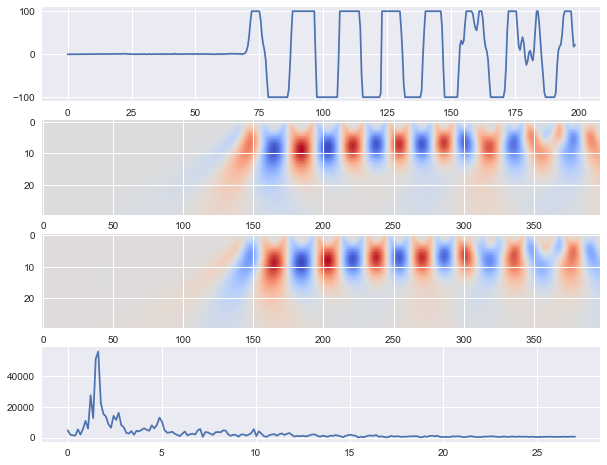

In [40]:
fig_test, axs_test = plt.subplots(4, figsize=(10,8))
coef, freq = pywt.cwt(df.iloc[0][21:], np.arange(1, 31), 'mexh')
cwtmatr = signal.cwt(df.iloc[9][21:], signal.ricker, np.arange(1,31))
axs_test[0].plot(time, df.iloc[0][21:])
axs_test[1].imshow(coef, cmap = 'coolwarm', aspect = 'auto')
axs_test[2].imshow(cwtmatr, cmap='coolwarm', aspect='auto')
axs_test[3].plot(rfftfreq(len(df.iloc[0][21:]), 1/54), np.abs(rfft(df.iloc[0][21:]*5)))
plt.show()

In [39]:
coef

array([[-2.62747245e-02, -3.91655518e-01, -1.93048327e-01, ...,
         1.74117740e+01, -2.19025077e+01, -1.78746734e+01],
       [-1.34056860e-01, -4.53545347e-01, -5.00550929e-01, ...,
         2.88409874e+01, -1.20101362e+01, -4.22679543e+01],
       [-1.71901483e-01, -4.08525002e-01, -5.32218534e-01, ...,
         4.97686447e+01,  1.79657591e+00, -4.05087547e+01],
       ...,
       [-8.06517237e-01, -7.97012548e-01, -9.05813208e-01, ...,
         3.38015104e+01,  3.86922662e+01,  3.99086614e+01],
       [-7.87635198e-01, -7.55632236e-01, -8.04684345e-01, ...,
         3.22958814e+01,  3.80033498e+01,  4.09066700e+01],
       [-7.71183922e-01, -7.43202505e-01, -7.95742887e-01, ...,
         3.06463335e+01,  3.54249793e+01,  3.70114870e+01]])

In [38]:
cwtmatr

array([[ 5.74078695e-02,  2.29625499e-01,  3.14300107e-02, ...,
        -1.33467754e+01,  2.50781209e+01,  1.65685777e+01],
       [ 5.58744142e-02,  2.23763771e-01,  2.52033359e-01, ...,
        -2.31350429e+01,  1.73330099e+01,  4.47788533e+01],
       [ 5.92422566e-02,  2.14830719e-01,  3.17083661e-01, ...,
        -4.12415139e+01,  6.09270665e+00,  4.54959552e+01],
       ...,
       [ 4.44391091e-01,  4.72351763e-01,  4.98434875e-01, ...,
        -4.31923938e+01, -4.48800974e+01, -4.63807727e+01],
       [ 4.34602635e-01,  4.62500473e-01,  4.88840263e-01, ...,
        -4.22525852e+01, -4.37093695e+01, -4.49977985e+01],
       [ 4.34314454e-01,  4.62561847e-01,  4.89388427e-01, ...,
        -4.13640966e+01, -4.26305342e+01, -4.37463201e+01]])

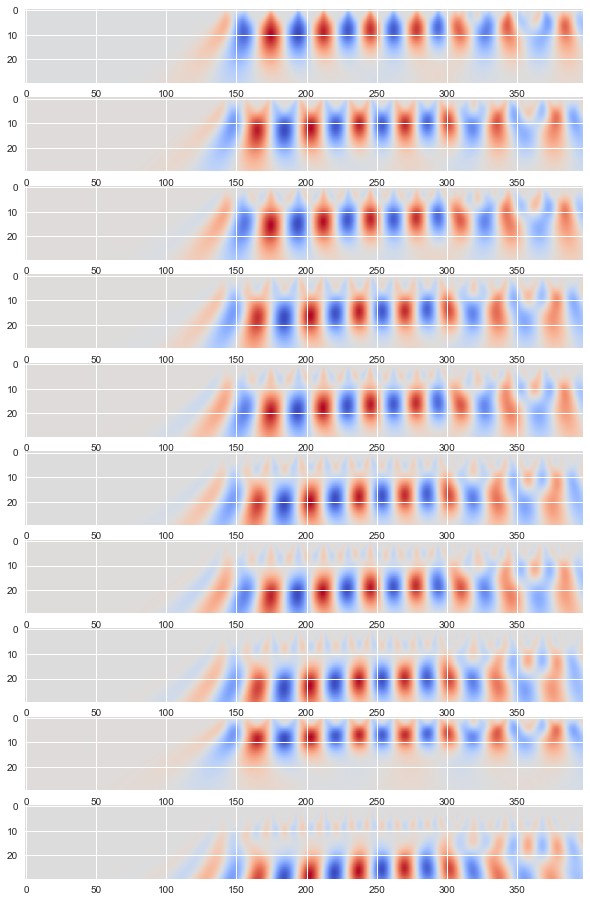

In [41]:
fig_w, axs_w = plt.subplots(len(wavelist), figsize=(10,16))
for i in range(len(wavelist)):
    coef, freq = pywt.cwt(df.iloc[9][21:], np.arange(1, 31), wavelist[i])
    axs_w[i].imshow(coef, cmap = 'coolwarm', aspect = 'auto')   

In [46]:
len(coef[0])

398

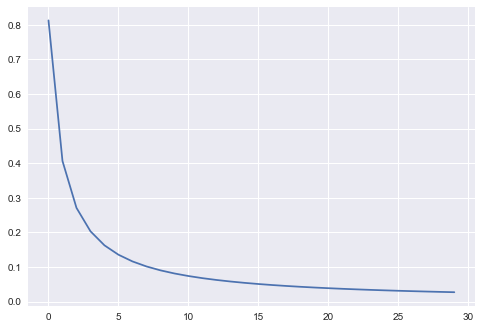

In [42]:
plt.plot(freq)

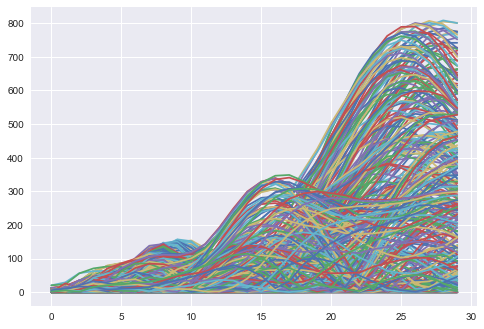

In [43]:
plt.plot(abs(coef))
plt.show()

In [ ]:
type()

In [51]:
Twxo, Wxo, *_ = ssq_cwt(df.iloc[0][21:].to_numpy())

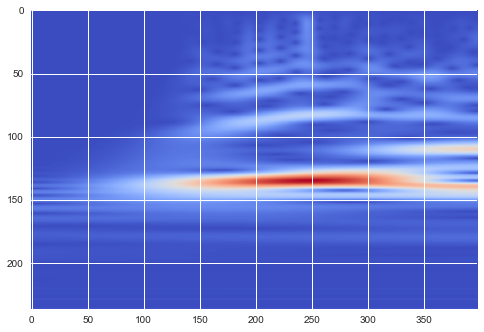

In [54]:
plt.imshow(np.abs(Wxo), aspect='auto', cmap='coolwarm')
plt.show()